In [3]:
import pandas as pd
import numpy as np
import json
import itertools
from keras.preprocessing import text, sequence
from keras import utils
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [4]:

import numpy
from keras.datasets import imdb
from matplotlib import pyplot
# load the dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)




In [5]:
print("train_data ", train_data.shape)
print("train_labels ", train_labels.shape)
print("_"*100)
print("test_data ", test_data.shape)
print("test_labels ", test_labels.shape)
print("_"*100)
print("Maximum value of a word index ")
print(max([max(sequence) for sequence in train_data]))
print("Maximum length num words of review in train ")
print(max([len(sequence) for sequence in train_data]))

train_data  (25000,)
train_labels  (25000,)
____________________________________________________________________________________________________
test_data  (25000,)
test_labels  (25000,)
____________________________________________________________________________________________________
Maximum value of a word index 
9999
Maximum length num words of review in train 
2494


In [6]:
# See an actual review in words
# Reverse from integers to words using the DICTIONARY (given by keras...need to do nothing to create it)

word_index = imdb.get_word_index()

reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[123]])

print(decoded_review)

? beautiful and touching movie rich colors great settings good acting and one of the most charming movies i have seen in a while i never saw such an interesting setting when i was in china my wife liked it so much she asked me to ? on and rate it so other would enjoy too


In [7]:
# VECTORIZE as one cannot feed integers into a NN 
# Encoding the integer sequences into a binary matrix - one hot encoder basically
# From integers representing words, at various lengths - to a normalized one hot encoded tensor (matrix) of 10k columns

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results


In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print("x_train ", x_train.shape)
print("x_test ", x_test.shape)


x_train  (25000, 10000)
x_test  (25000, 10000)


In [9]:
# VECTORIZE the labels too - NO INTEGERS only floats into a tensor...(rare exceptions)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)





y_train  (25000,)
y_test  (25000,)


In [11]:
batch_size = 32
epochs = 5
# Build the model

model = Sequential()
model.add(Dense(512, input_shape=(10000,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 91s 5ms/step - loss: 7.9465 - acc: 0.5016 - val_loss: 8.0700 - val_acc: 0.4938
Epoch 2/5
20000/20000 [==============================] - 84s 4ms/step - loss: 7.9465 - acc: 0.5016 - val_loss: 8.0700 - val_acc: 0.4938
Epoch 3/5
20000/20000 [==============================] - 83s 4ms/step - loss: 7.9465 - acc: 0.5016 - val_loss: 8.0700 - val_acc: 0.4938
Epoch 4/5
20000/20000 [==============================] - 82s 4ms/step - loss: 7.9465 - acc: 0.5016 - val_loss: 8.0700 - val_acc: 0.4938
Epoch 5/5
25000/25000 [==============================] - 12s 474us/step
Test score: 7.971192817382812
Test accuracy: 0.5


In [12]:
batch_size = 100
epochs = 5
# Build the model

model = Sequential()
model.add(Dense(512, input_shape=(10000,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('softmax'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 36s 2ms/step - loss: 7.9465 - acc: 0.5015 - val_loss: 8.0700 - val_acc: 0.4938
Epoch 2/5
20000/20000 [==============================] - 34s 2ms/step - loss: 7.9465 - acc: 0.5015 - val_loss: 8.0700 - val_acc: 0.4938
Epoch 3/5
20000/20000 [==============================] - 34s 2ms/step - loss: 7.9465 - acc: 0.5015 - val_loss: 8.0700 - val_acc: 0.4938
Epoch 4/5
20000/20000 [==============================] - 34s 2ms/step - loss: 7.9465 - acc: 0.5015 - val_loss: 8.0700 - val_acc: 0.4938
Epoch 5/5
25000/25000 [==============================] - 9s 372us/step
Test score: 7.971192243576049
Test accuracy: 0.4999999967813492


In [18]:
y_pred = model.predict(x_test) #prediction

Confusion matrix, without normalization
[[    0 12500]
 [    0 12500]]


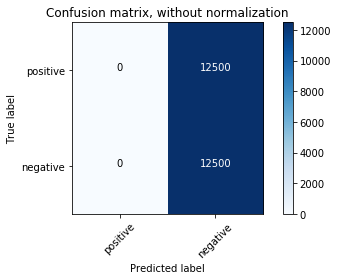

In [19]:
#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['positive','negative'],
                      title='Confusion matrix, without normalization')

In [20]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  0
False Positives:  12500
False Negatives:  0
True Positives:  12500
